### testing util fns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def parse(filepath: str):
    '''
    Will use csv header to determine if it is MNIST train or test set

    args:
        filepath: path (string) pointing to location of csv file
    returns:
        X: numpy matrix of size (examples, attributes)
        y: numpy matrix
    '''
    with open(filepath, newline='\n') as file:
        project1reader = csv.reader(file, delimiter=',')
        num_rows = 0
        num_cols = 0
        training = True
        for i, row in enumerate(project1reader):
            if i == 0:
                if row[0] != 'label':
                    training = False
                    num_cols = len(row)
                else:
                    num_cols = len(row) -1
            else:
                num_rows = i
        print('Importing data...')
        print('Size of dataset: {} examples with {} attributes.\nTraining set: {}'.format(num_rows, num_cols, training))
        X = np.zeros((num_rows, num_cols))
        y = np.zeros((num_rows,))
    # you have to read again:
    with open(filepath, newline='\n') as file:
        project1reader = csv.reader(file, delimiter=',')
        for i, row in enumerate(project1reader):
            if i != 0:
                if training:
                    X[i-1] = np.array(row[1:]).astype(int)
                    y[i-1] = np.array(row[0]).astype(int)
                else:
                    X[i-1] = np.array(row).astype(int)
        if training:
            return X, y
        else:
            return X

In [3]:
X_train, y_train = parse('../data/training.csv')

Importing data...
Size of dataset: 21000 examples with 784 attributes.
Training set: True


In [4]:
X_test = parse('../data/testing.csv')

Importing data...
Size of dataset: 21000 examples with 784 attributes.
Training set: False


In [5]:
np.shape(X_test[0])

(784,)

In [11]:
np.sum(X_train)

549964376.0

In [12]:
def project1normalize(X: np.ndarray):
    return X/255

In [8]:
def print_digit(x: np.ndarray):
    x_img = np.zeros((28,28))
    for i in range(len(x)):
        x_img[int(i/28),(i%28)] = x[i]
    # x_temp = np.zeros((28,28))
    # x_temp[5,5] = 1
    plt.imshow(x_img, cmap='gray_r')

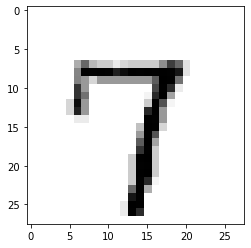

In [14]:
print_digit(X_train[1])

In [10]:
np.sum((X_test[5]==0))

606

# re-enumerate